<a href="https://www.kaggle.com/code/ritikaverma2015/data-visualization-space-voyage-titanic?scriptVersionId=106969518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  Data Visualization : Space Voyage Titanic

In [92]:
# import dependencies 
%matplotlib inline

# Start python imports
import math, time, random, datetime

# Data manipulations
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Machine Learning 
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier , cv
import warnings
warnings.filterwarnings("ignore")



In [176]:
# Import train and test Data set

train = pd.read_csv("C:/Users/RITIKA VERMA/Downloads/spaceship_titanic/train.csv")
test = pd.read_csv("C:/Users/RITIKA VERMA/Downloads/spaceship_titanic/test.csv")
sample_submission = pd.read_csv("C:/Users/RITIKA VERMA/Downloads/spaceship_titanic/sample_submission.csv")

In [177]:
# Viwe the training data
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [178]:
train.shape

(8693, 14)

In [179]:
# View the test data 
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [180]:
test.shape

(4277, 13)

In [181]:
# view the sample submission format
sample_submission.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [182]:
sample_submission.shape

(4277, 2)

# Data Description 


Target Variables :
Transported :
False : passenger is not transmitted to other dimension
True : passenger is transmitted to other dimension

Non- Target variables :
1) Passenger ID : 
unique ID
gggg_pp where gggg : group the passenger is travelling with
               pp  : Their number within the group
               
2) Home Planet : The planet of departure

3) Cyrosleep: 
True : passenger elected t0 be put into suspended animation
false : passenger is not elected to be put into suspended animation.

4) Cabin:
The cabin number where the passenger is staying.
deck/num/side :   side : P(port) or S(starboard)

5) Destination : 
The planet the passenger will be debarking to.

6) Age : 
The age of the passenger.

7) VIP:
True : passenger has paid for special VIP services during the voyage.
False : passenger hasn't paid for special VIP service during the voyage.

8) RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 
Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

9) Name : 
The first and the last name of the passenger.


In [198]:
# Some statistics about the training data set:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# What missing values are there ?

What are the holes in the data?

These are the rows which are missing a value or have NaN instead of something like the rest of the columns.

<AxesSubplot:>

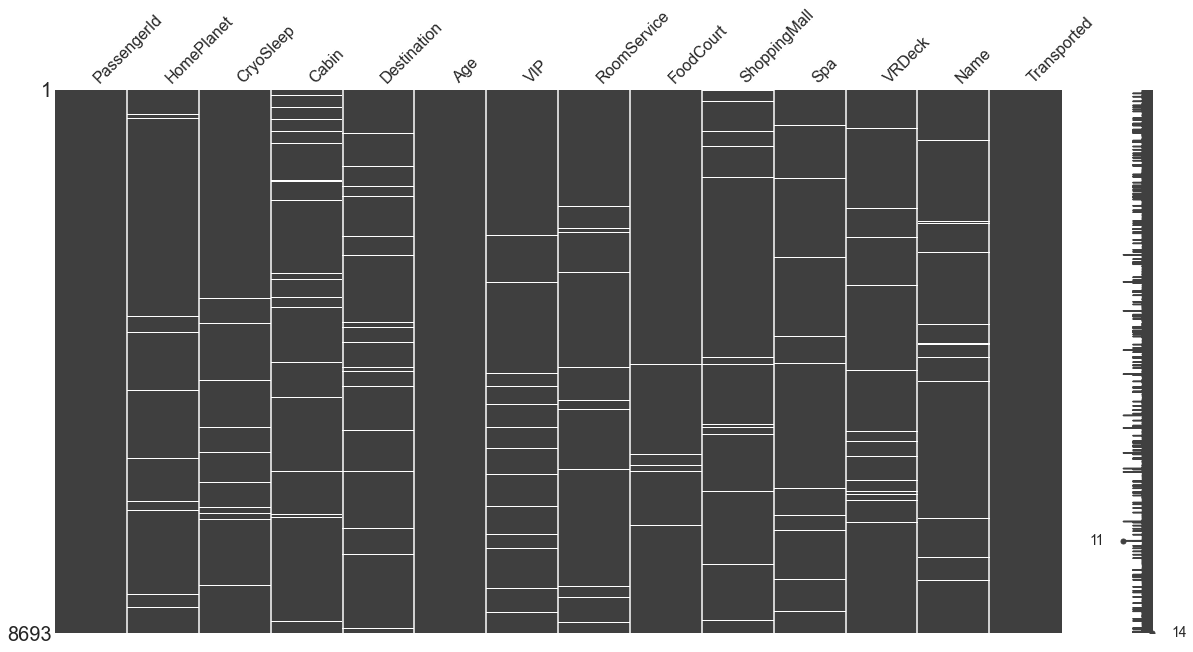

In [199]:
# Plot graphics of the missing values 
missingno.matrix(train, figsize=(20,10))

In [200]:
# Define the function that calculates the missing values 

def missing_values(df, columns):
    missing_values ={}
    
    print("Number of missing or NaN values for each column:")
    
    df_len = len(df)
    
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_values[column] = df_len - total_column_values
    return missing_values

missing_values_list = missing_values(df = train, columns = train.columns)
missing_values_list

Number of missing or NaN values for each column:


{'PassengerId': 0,
 'HomePlanet': 201,
 'CryoSleep': 217,
 'Cabin': 199,
 'Destination': 182,
 'Age': 0,
 'VIP': 203,
 'RoomService': 181,
 'FoodCourt': 183,
 'ShoppingMall': 208,
 'Spa': 183,
 'VRDeck': 188,
 'Name': 200,
 'Transported': 0}

In [201]:
# How many total values do we have ?
total_cells = np.product(train.shape)
missing_each_column = train.isnull().sum()
total_missing = missing_each_column.sum()

# percentage of missing_values 
percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)
print(total_missing)

1.762501848778163

2145


# To perform our data analysis, let's create two new dataframes

We will create one for exploring dicretised continuous variables(continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.


In [202]:
df_bin = pd.DataFrame()  # for dicretised continuous variables.
df_con = pd.DataFrame()  # for continuous variables.

In [203]:
# Different data types in the dataset
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# Let's explore each feature individually

We will go through each column iteratively and see which ines to use in our models. Some may need more processing than others to get ready.

# Target Feature : Transported 

Decription :
True : If the passenger is successfully transported to the another dimension.


False : If the passenger is not transported to the other dimension.

This is the target, the column we are trying to predict.


True     4378

False    4315

Name: Transported, dtype: int64


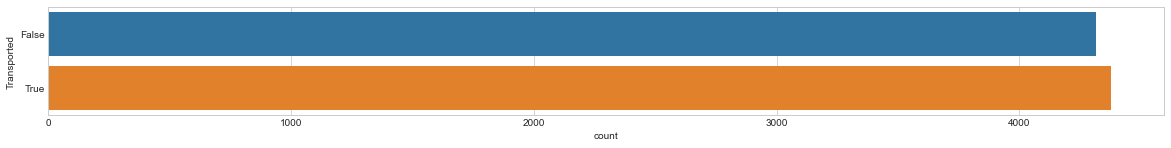

In [204]:
# How many people transported 

fig = plt.figure(figsize=(20,2))
sns.countplot(y = 'Transported', data = train)
print(train.Transported.value_counts())

There are almost equal number of passengers that are transported and not transported to the other dimension.

In [205]:
# Since this is already binary varibale (True or False )
# Let's Just add this directly.

df_bin['Transported'] = train['Transported']
df_con['Transported'] = train['Transported']

df_bin['Transported'] = np.where(train['Transported']== True, 1,0)
df_con['Transported'] = np.where(train['Transported']== True , 1,0)



In [206]:
df_bin.head(3)

,Transported
0,0
1,1
2,0


In [207]:
df_con.head(3)

,Transported
0,0
1,1
2,0


<b>Function to Create count and distribution visualization</b>

In [208]:
def plot_count_dist(data, bin_df, label_column, target_column, 
                    figsize=(20,5), use_bin_df = False):
    
    if use_bin_df:
        fig = plt.figure(figsize = figsize)
        plt.subplot(1,2,1)
        sns.countplot(y = target_column, data = bin_df)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column], kde_kws={"label": "Transported"})
        sns.distplot(data.loc[data[label_column]==0][target_column],kde_kws ={"label": "Not transported"})
        
    else :
        fig = plt.figure(figsize = figsize)
        plt.subplot(1,2,1)
        sns.countplot(y = target_column, data = data)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column], kde_kws={"label": "Transported"})
        sns.distplot(data.loc[data[label_column]==0][target_column],kde_kws ={"label": "Not transported"})

# Feature : Home Planet

Decription :The planet of departure

In [209]:
# Number of missing values?
print(len(train))
print(missing_values_list['HomePlanet'])

8693

201


In [210]:
# Percentage missing 
percentage_missing = (201/8693)*100
print(percentage_missing)

2.312205222592891


In [211]:
# What values are there ?
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [212]:
# We can fill the unrecorded data
# Replacing all NA's the value that comes directly after it in the same
# column

df_bin['HomePlanet'] = train['HomePlanet']
df_con['HomePlanet'] = train['HomePlanet']

df_bin['HomePlanet'] = df_bin.HomePlanet.fillna(method='bfill',axis=0)
df_con['HomePlanet'] = df_con.HomePlanet.fillna(method='bfill',axis=0)

print("There are {} missing values in df_bin.".format(df_bin.HomePlanet.isnull().sum()))
print("There are {} missing values in df_con.".format(df_con.HomePlanet.isnull().sum()))

df_bin.head()

There are 0 missing values in df_bin.

There are 0 missing values in df_con.


,Transported,HomePlanet
0,0,Europa
1,1,Earth
2,0,Europa
3,0,Europa
4,1,Earth


In [213]:
# Here to visualize the data, we need to add numeric symbols to 
# each type of Homeplanet

def word_to_symbol(df, col_name):
    col_name_new=[];
    for i in range(len(df[col_name])):
        if df[col_name][i]=='Europa':
            col_name_new.append(1)
        elif df[col_name][i]=='Earth':
            col_name_new.append(2)
        elif df[col_name][i]=='Mars':
            col_name_new.append(3)
    col_name_new = pd.Series(col_name_new)
    return col_name_new
   

    

df_bin['Home_Planet'] = word_to_symbol(df_bin, 'HomePlanet')
df_con['Home_Planet'] = word_to_symbol(df_con, 'HomePlanet')

df_bin = df_bin.drop('HomePlanet',axis =1)
df_con = df_con.drop('HomePlanet',axis =1)
print(df_bin.head(3))

print(df_con.head(3))


   Transported  Home_Planet

0            0            1

1            1            2

2            0            1

   Transported  Home_Planet

0            0            1

1            1            2

2            0            1


<AxesSubplot:xlabel='Home_Planet', ylabel='Density'>

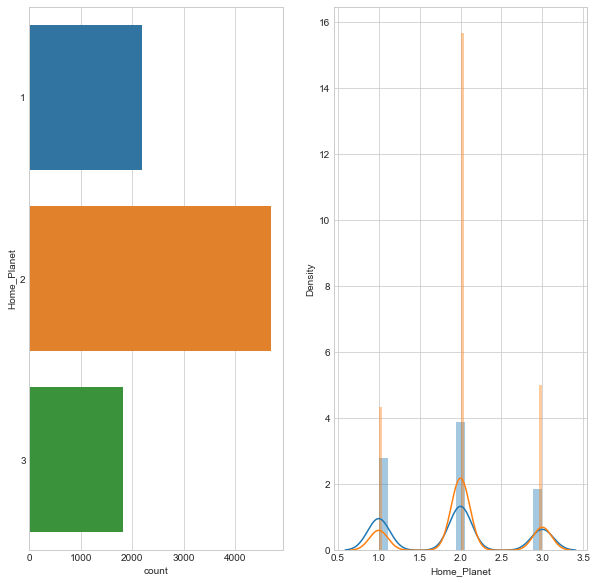

In [214]:
# Visualize the counts of HomePlant and the distribution of the values
# against transported

fig = plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.countplot(y = 'Home_Planet', data = df_bin)
plt.subplot(1,2,2)
sns.distplot(df_bin.loc[df_bin['Transported']==1]['Home_Planet'], kde_kws={"label": "Transported"})
sns.distplot(df_bin.loc[df_bin['Transported']==0]['Home_Planet'], kde_kws ={"label": "Not transported"})

We can observe that :
If the passenger is from class 1 i.e. Europa then chances of passengers will be transported are higher.

If the passenger is from class 2 i.e. Earth then chances of passengers will be lesser

If the passenger is from class 3 i.e. Mars then the chances of passengers will be equal for being transported and not being transported.


In [215]:
train.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


# Feature CryoSleep

True : passenger elected to be put into suspended animation 

false : passenger is not elected to be put into suspended animation.

In [216]:
# Number of missing values
missing_values_list['CryoSleep']

217

In [217]:
# Percentage missing 
percentage_missing = (217/8693)*100
print(percentage_missing)

2.4962613597147127


In [218]:
# What values are there ?
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [219]:
# Average value , median value
average = train.CryoSleep.mean()
print(average)

median = train.CryoSleep.median()
print(median)

mode = train.CryoSleep.mode()
print(mode)

# There are higher chances that the missing values are filled with 0.

0.35830580462482303

0.0

0    False

Name: CryoSleep, dtype: object


In [220]:
# Let us consider bundles of equal lengths examples and fill the NA values in CryoSleep.
#total_cells_col = len(train.CryoSleep)

In [221]:
# Adding values in the dataframe
df_bin['CryoSleep'] = train['CryoSleep']
df_con['CryoSleep'] = train['CryoSleep']

df_bin['CryoSleep'] = np.where(df_bin['CryoSleep']== True, 1,0)
df_con['CryoSleep'] = np.where(df_con['CryoSleep']== True, 1,0)


In [222]:
# Missing values 
print("There are {} missing values in Cryosleep".format(df_bin.CryoSleep.isnull().sum()))

There are 0 missing values in Cryosleep


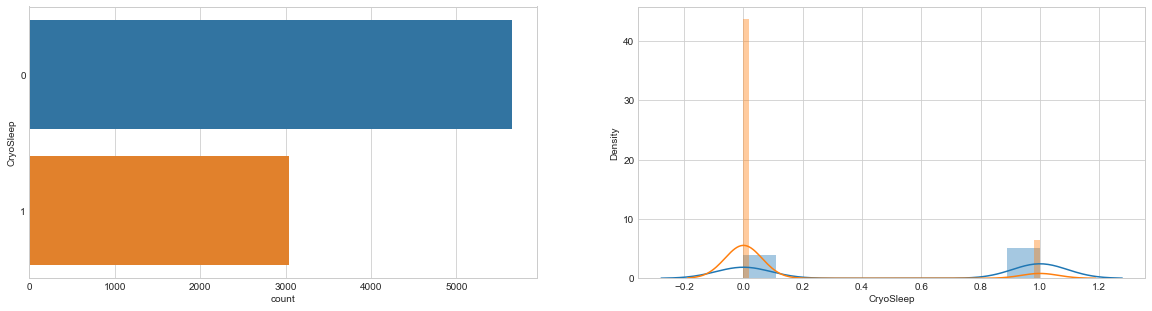

In [223]:
# # Visualize the counts of Cryosleep and the distribution of the values
# against transported

plot_count_dist(df_bin, 
                bin_df = df_bin, 
                label_column = 'Transported', 
                target_column ='CryoSleep',
                use_bin_df = True)

If some passenger is selected for CryoSleep then the chances of being transported are higher than those who are not selected for CryoSleep.


# Feature Cabin

Description : It describes the cabin in which the passenger stays

deck/num/side : side : P(port) or S(starboard)

In [224]:
# How Many missing values
missing_values_list['Cabin']

199

In [225]:
# Percentage missing 
percentage_missing = (199/8693)*100
print(percentage_missing)

2.289198205452663


In [226]:
# What values are there
train.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Cabin'>

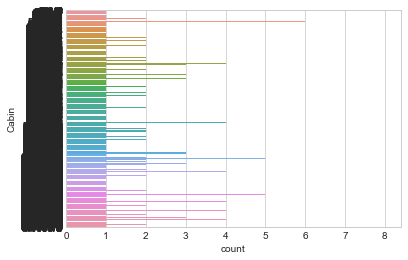

In [227]:
# How many different values of Cabins are there ?
sns.countplot(y ='Cabin', data = train)

In [228]:
# How many unique kinds of cabin are there ?
print("Length of the cabin feature in dataframe is {}".format(len(train.Cabin)))
print("There are {} unique cabins.".format(len(train.Cabin.unique())))

Length of the cabin feature in dataframe is 8693

There are 6561 unique cabins.


In [350]:
# We can try to extract the Deck and Port from the string
train_sub=[]
train_sub= train.Cabin.fillna('F/0/P')
Deck_Port_list =[];
Port_list=[];
Deck_list=[];
for i in range(len(train.Cabin)):
    Deck_Port_list.append([train_sub[i][0],train_sub[i][-1]])
    Port_list.append(train_sub[i][-1])
    Deck_list.append(train_sub[i][0])

Deck_Port_list = pd.Series(Deck_Port_list)

In [230]:
Deck_Port_list

0       [B, P]
1       [F, S]
2       [A, S]
3       [A, S]
4       [F, S]
         ...  
8688    [A, P]
8689    [G, S]
8690    [G, S]
8691    [E, S]
8692    [E, S]
Length: 8693, dtype: object

In [231]:
Deck_Port_list.value_counts()

[F, P]    1637
[F, S]    1356
[G, S]    1283
[G, P]    1276
[E, S]     447
[E, P]     429
[B, S]     426
[C, S]     406
[B, P]     353
[C, P]     341
[D, P]     248
[D, S]     230
[A, S]     139
[A, P]     117
[T, P]       4
[T, S]       1
dtype: int64

In [232]:
Port_list = pd.Series(Port_list)
Deck_list = pd.Series(Deck_list)
print(Port_list.value_counts())

print("\n")

print(Deck_list.value_counts())

P    4405

S    4288

dtype: int64





F    2993

G    2559

E     876

B     779

C     747

D     478

A     256

T       5

dtype: int64


In [233]:
# Function To visualize how many people transported with different ports
port_p_count_1_F =0
port_p_count_0_F=0

port_s_count_1_F =0
port_s_count_0_F =0
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'P' and train.Transported[i]== True and train_sub[i][0]=='F':
            port_p_count_1_F +=1
    else: 
        port_p_count_0_F+=1  
        
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'S' and train.Transported[i]== True and train_sub[i][0]=='F':
            port_s_count_1_F +=1
    else: 
        port_s_count_0_F +=1  

In [234]:
print("{} number of People on port P and deck F are transported. ".format(port_p_count_1_F))
print("{} number of People on port P and deck F aren't transported.".format(port_p_count_0_F))

print("\n")

print("{} number of People on port S and deck F are transported. ".format(port_s_count_1_F))
print("{} number of People on port S  and deck F aren't transported. ".format(port_s_count_0_F))

691 number of People on port P and deck F are transported. 

8002 number of People on port P and deck F aren't transported.





638 number of People on port S and deck F are transported. 

8055 number of People on port S  and deck F aren't transported. 


In [235]:
port_p_count_1_G =0
port_p_count_0_G=0

port_s_count_1_G =0
port_s_count_0_G =0
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'P' and train.Transported[i]== True and train_sub[i][0]=='G':
            port_p_count_1_G +=1
    else: 
        port_p_count_0_G+=1  
        
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'S' and train.Transported[i]== True and train_sub[i][0]=='G':
            port_s_count_1_G +=1
    else: 
        port_s_count_0_G +=1  

In [236]:
print("{} number of People on port P and deck G are transported. ".format(port_p_count_1_G))
print("{} number of People on port P and deck G aren't transported.".format(port_p_count_0_G))

print("\n")

print("{} number of People on port S and deck G are transported. ".format(port_s_count_1_G))
print("{} number of People on port S  and deck G aren't transported. ".format(port_s_count_0_G))

572 number of People on port P and deck G are transported. 

8121 number of People on port P and deck G aren't transported.





749 number of People on port S and deck G are transported. 

7944 number of People on port S  and deck G aren't transported. 


In [237]:
port_p_count_1_E =0
port_p_count_0_E=0

port_s_count_1_E =0
port_s_count_0_E =0
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'P' and train.Transported[i]== True and train_sub[i][0]=='E':
            port_p_count_1_E +=1
    else: 
        port_p_count_0_E+=1  
        
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'S' and train.Transported[i]== True and train_sub[i][0]=='E':
            port_s_count_1_E +=1
    else: 
        port_s_count_0_E +=1 

In [238]:
print("{} number of People on port P and deck E are transported. ".format(port_p_count_1_E))
print("{} number of People on port P and deck E aren't transported.".format(port_p_count_0_E))

print("\n")

print("{} number of People on port S and deck E are transported. ".format(port_s_count_1_E))
print("{} number of People on port S  and deck E aren't transported. ".format(port_s_count_0_E))

147 number of People on port P and deck E are transported. 

8546 number of People on port P and deck E aren't transported.





166 number of People on port S and deck E are transported. 

8527 number of People on port S  and deck E aren't transported. 


In [239]:
port_p_count_1_B =0
port_p_count_0_B=0

port_s_count_1_B =0
port_s_count_0_B =0
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'P' and train.Transported[i]== True and train_sub[i][0]=='B':
            port_p_count_1_B +=1
    else: 
        port_p_count_0_B+=1  
        
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'S' and train.Transported[i]== True and train_sub[i][0]=='B':
            port_s_count_1_B +=1
    else: 
        port_s_count_0_B +=1 

In [240]:
print("{} number of People on port P and deck B are transported. ".format(port_p_count_1_B))
print("{} number of People on port P and deck B aren't transported.".format(port_p_count_0_B))

print("\n")

print("{} number of People on port S and deck B are transported. ".format(port_s_count_1_B))
print("{} number of People on port S  and deck B aren't transported. ".format(port_s_count_0_B))

238 number of People on port P and deck B are transported. 

8455 number of People on port P and deck B aren't transported.





334 number of People on port S and deck B are transported. 

8359 number of People on port S  and deck B aren't transported. 


In [241]:
port_p_count_1_C =0
port_p_count_0_C=0

port_s_count_1_C =0
port_s_count_0_C =0
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'P' and train.Transported[i]== True and train_sub[i][0]=='C':
            port_p_count_1_C +=1
    else: 
        port_p_count_0_C+=1  
        
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'S' and train.Transported[i]== True and train_sub[i][0]=='C':
            port_s_count_1_C +=1
    else: 
        port_s_count_0_C +=1 

In [242]:
print("{} number of People on port P and deck C are transported. ".format(port_p_count_1_C))
print("{} number of People on port P and deck C aren't transported.".format(port_p_count_0_C))

print("\n")

print("{} number of People on port S and deck C are transported. ".format(port_s_count_1_C))
print("{} number of People on port S  and deck C aren't transported. ".format(port_s_count_0_C))

198 number of People on port P and deck C are transported. 

8495 number of People on port P and deck C aren't transported.





310 number of People on port S and deck C are transported. 

8383 number of People on port S  and deck C aren't transported. 


In [243]:
port_p_count_1_D =0
port_p_count_0_D=0

port_s_count_1_D =0
port_s_count_0_D =0
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'P' and train.Transported[i]== True and train_sub[i][0]=='D':
            port_p_count_1_D +=1
    else: 
        port_p_count_0_D+=1  
        
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'S' and train.Transported[i]== True and train_sub[i][0]=='D':
            port_s_count_1_D +=1
    else: 
        port_s_count_0_D +=1 

In [244]:
print("{} number of People on port P and deck D are transported. ".format(port_p_count_1_D))
print("{} number of People on port P and deck D aren't transported.".format(port_p_count_0_D))

print("\n")

print("{} number of People on port S and deck D are transported. ".format(port_s_count_1_D))
print("{} number of People on port S  and deck D aren't transported. ".format(port_s_count_0_D))

100 number of People on port P and deck D are transported. 

8593 number of People on port P and deck D aren't transported.





107 number of People on port S and deck D are transported. 

8586 number of People on port S  and deck D aren't transported. 


In [245]:
port_p_count_1_A =0
port_p_count_0_A=0

port_s_count_1_A =0
port_s_count_0_A =0
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'P' and train.Transported[i]== True and train_sub[i][0]=='A':
            port_p_count_1_A+=1
    else: 
        port_p_count_0_A+=1  
        
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'S' and train.Transported[i]== True and train_sub[i][0]=='A':
            port_s_count_1_A +=1
    else: 
        port_s_count_0_A +=1 

In [246]:
print("{} number of People on port P and deck A are transported. ".format(port_p_count_1_A))
print("{} number of People on port P and deck A aren't transported.".format(port_p_count_0_A))

print("\n")

print("{} number of People on port S and deck A are transported. ".format(port_s_count_1_A))
print("{} number of People on port S  and deck A aren't transported. ".format(port_s_count_0_A))

51 number of People on port P and deck A are transported. 

8642 number of People on port P and deck A aren't transported.





76 number of People on port S and deck A are transported. 

8617 number of People on port S  and deck A aren't transported. 


In [247]:
port_p_count_1_T =0
port_p_count_0_T=0

port_s_count_1_T =0
port_s_count_0_T =0
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'P' and train.Transported[i]== True and train_sub[i][0]=='T':
            port_p_count_1_T +=1
    else: 
        port_p_count_0_T+=1  
        
for i in range(len(train.Cabin)):
    if train_sub[i][-1]== 'S' and train.Transported[i]== True and train_sub[i][0]=='T':
            port_s_count_1_T +=1
    else: 
        port_s_count_0_T +=1 

In [248]:
print("{} number of People on port P and deck T are transported. ".format(port_p_count_1_T))
print("{} number of People on port P and deck T aren't transported.".format(port_p_count_0_T))

print("\n")

print("{} number of People on port S and deck T are transported. ".format(port_s_count_1_T))
print("{} number of People on port S  and deck T aren't transported. ".format(port_s_count_0_T))

1 number of People on port P and deck T are transported. 

8692 number of People on port P and deck T aren't transported.





0 number of People on port S and deck T are transported. 

8693 number of People on port S  and deck T aren't transported. 


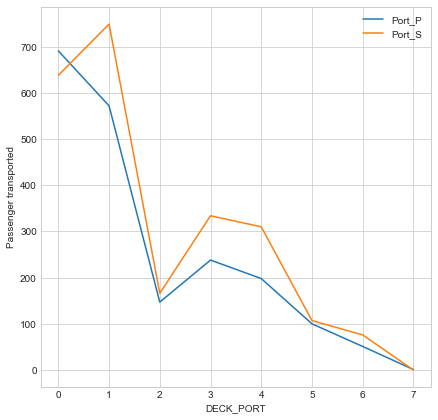

In [249]:
# Visualization

Passenger_trans_port_p = [port_p_count_1_F,port_p_count_1_G,port_p_count_1_E,
                         port_p_count_1_B,port_p_count_1_C,port_p_count_1_D,
                         port_p_count_1_A,port_p_count_1_T]

Passenger_trans_port_s = [port_s_count_1_F,port_s_count_1_G,port_s_count_1_E,
                         port_s_count_1_B,port_s_count_1_C,port_s_count_1_D,
                         port_s_count_1_A,port_s_count_1_T]
figure = plt.figure(figsize=(7,7))
plt.plot(Passenger_trans_port_p)
plt.plot(Passenger_trans_port_s)
plt.xlabel("DECK_PORT")
plt.ylabel("Passenger transported")
plt.legend(['Port_P','Port_S'])


Here We can observe that Passengers from Port_S are transported more than from the Port_P with all possible combination of Decks.

In [250]:
# Adding the Port data into sub Data Frames
df_bin['Port'] = Port_list
df_con['Port'] =Port_list

df_bin['Port'] = np.where(df_bin['Port']=='P',1,0)
df_con['Port'] = np.where(df_con['Port']=='P',1,0)


In [251]:
# Adding Deck data into sub data frame
df_bin['Deck'] = Deck_list
df_con['Deck'] = Deck_list

In [252]:
# View the Sub Data set
df_bin.head(3)


,Transported,Home_Planet,CryoSleep,Port,Deck
0,0,1,0,1,B
1,1,2,0,0,F
2,0,1,0,0,A


In [253]:
df_con.head(3)

,Transported,Home_Planet,CryoSleep,Port,Deck
0,0,1,0,1,B
1,1,2,0,0,F
2,0,1,0,0,A


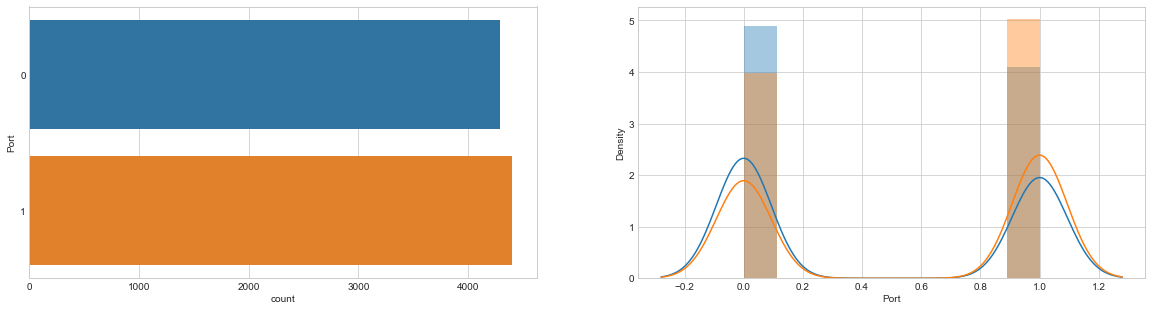

In [254]:
# Visualization of Count and distribution plot

plot_count_dist(df_bin, 
                bin_df = df_bin, 
                label_column = 'Transported', 
                target_column ='Port', 
                    figsize=(20,5), use_bin_df = False)

Here, we can again observe that Passengers from Port_S are transported more than from the Port_P with all possible combination of Decks.

# Feature : Destination

Destination : The planet the passenger will be debarking to


In [255]:
# How many missing values are there?
train.Destination.dtype

dtype('O')

In [256]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [257]:
#How many missing values 
missing_values_list['Destination']

182

In [258]:
# Percentage of missing values
percentage_missing = (182/8693)*100
print(percentage_missing)


2.093638559760727


In [259]:
# Filling the missing values 

def fill_missing_values(df, col_name):
    Destination =[]
    for i in range(len(df[col_name])):
        if df[col_name][i]!= 'TRAPPIST-1e' and df[col_name][i]!= '55 Cancri e' and df[col_name][i]!= 'PSO J318.5-22':
             Destination.append('TRAPPIST-1e')
        else:
            Destination.append(df[col_name][i])
    Destination = pd.Series(Destination)
    return Destination
    
        
            
            
Destination = fill_missing_values(train, 'Destination')


In [260]:
#adding data into subdata frames
df_bin['Destination'] = Destination
df_con['Destination'] = Destination

TRAPPIST-1e      6097

55 Cancri e      1800

PSO J318.5-22     796

Name: Destination, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Destination'>

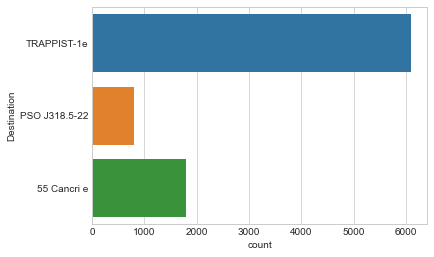

In [261]:
# Countplot for Destination in df_bin
print(df_bin.Destination.value_counts())
sns.countplot(y ='Destination', data = df_bin)

In [262]:
# Here to visualize the data, we need to add numeric symbols to 
# each type of Destination

def word_to_symbol(df, col_name):
    col_name_new=[];
    for i in range(len(df[col_name])):
        if df[col_name][i]=='TRAPPIST-1e':
            col_name_new.append(1)
        elif df[col_name][i]=='55 Cancri e':
            col_name_new.append(2)
        elif df[col_name][i]=='PSO J318.5-22':
            col_name_new.append(3)
    col_name_new = pd.Series(col_name_new)
    return col_name_new
   

    

df_bin['Final_Destination_'] = word_to_symbol(df_bin, 'Destination')
df_con['Final_Destination'] = word_to_symbol(df_con, 'Destination')

df_bin = df_bin.drop('Destination',axis =1)
df_con = df_con.drop('Destination',axis =1)
print(df_bin.head(3))

print(df_con.head(3))

   Transported  Home_Planet  CryoSleep  Port Deck  Final_Destination_

0            0            1          0     1    B                   1

1            1            2          0     0    F                   1

2            0            1          0     0    A                   1

   Transported  Home_Planet  CryoSleep  Port Deck  Final_Destination

0            0            1          0     1    B                  1

1            1            2          0     0    F                  1

2            0            1          0     0    A                  1


Here Labels are as following:

1) TRAPPIST-1e is labeled as 1   

2) 55 Cancri e is labeled as 2  

3) PSO J318.5-22 is labeled as 3

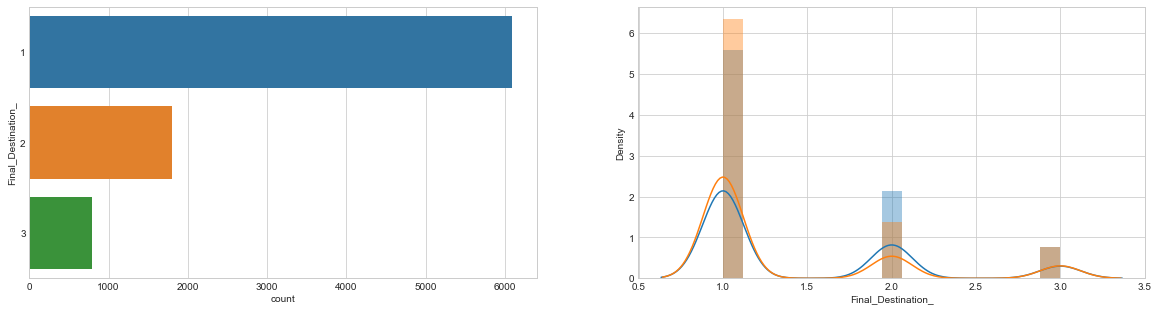

In [263]:
# Visualization of Count and distribution plot

plot_count_dist(df_bin, 
                bin_df = df_bin, 
                label_column = 'Transported', 
                target_column ='Final_Destination_', 
                    figsize=(20,5), use_bin_df = False)

Here we can observe that passenger having final destination as 55 Cancri have the higher relative rate of being transported rather than being not transported.

In [264]:
train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


# Feature : Age 

In [265]:
# How many missing values are there ?
missing_values_list['Age']

0

In [266]:
# filling missing values
avg = train.Age.mean()
print(avg)

28.827930467465347


In [267]:
#filling missing values
Age = train.Age.fillna(avg)
train['Age']=Age
train.Age.isnull().sum()

0

<AxesSubplot:xlabel='count', ylabel='Age'>

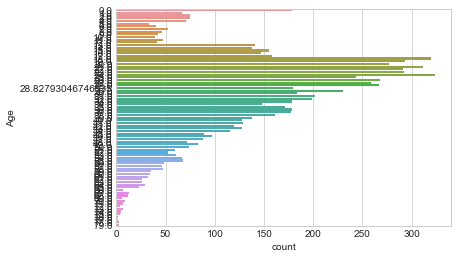

In [268]:
# How many different values of Age are there?
sns.countplot(y='Age', data= train)

In [269]:
# How many different values of Age are there?
train.Age.value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 81, dtype: int64

In [270]:
#adding missing values to the sub dataframes
df_bin['Age'] = pd.cut(Age,bins = 5)
df_con['Age'] = Age

In [271]:
df_bin.head(2)

,Transported,Home_Planet,CryoSleep,Port,Deck,Final_Destination_,Age
0,0,1,0,1,B,1,"(31.6, 47.4]"
1,1,2,0,0,F,1,"(15.8, 31.6]"


In [272]:
df_con.head(2)

,Transported,Home_Planet,CryoSleep,Port,Deck,Final_Destination,Age
0,0,1,0,1,B,1,39.0
1,1,2,0,0,F,1,24.0


In [274]:
df_bin.Age.value_counts()

(15.8, 31.6]      4244
(31.6, 47.4]      2243
(-0.079, 15.8]    1240
(47.4, 63.2]       830
(63.2, 79.0]       136
Name: Age, dtype: int64

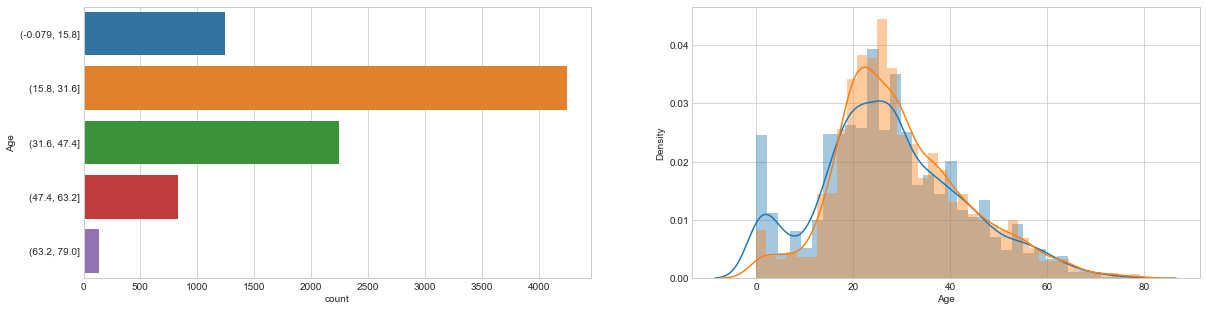

In [275]:
# Visualization of the Fare bin counts as the Age distribution 
# versus Transported.

plot_count_dist(data = train,
               bin_df = df_bin,
               label_column = 'Transported',
               target_column = 'Age',
               use_bin_df = True
               )



Observation : Passengers of age lesser than 20, were more likely to be transported. Whereas, passengers of age more than 20 and lesser than 50 are more likey to not be transported. Else, the chances of being transported or not is same.

In [276]:
train.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


# Feature : VIP

VIP:

True : passenger has paid for special VIP services during the voyage.

False : passenger hasn't paid for special VIP service during the voyage.

In [278]:
# How many missing values are there?
train.VIP.isnull().sum()

203

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


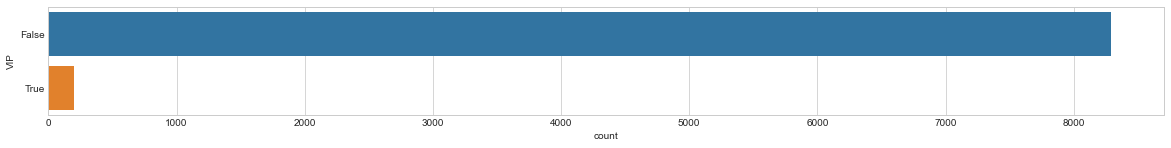

In [281]:
plt.figure(figsize=(20,2))
sns.countplot(y ='VIP', data =train)
train.head(1)

We need to resolve imbalance class problem. We are not adding this into our initial model.


# Feature : Room Service

In [283]:
# How many missing values are there?
train.RoomService.isnull().sum()

181

In [284]:
train.RoomService.head(15)

0       0.0
1     109.0
2      43.0
3       0.0
4     303.0
5       0.0
6      42.0
7       0.0
8       0.0
9       0.0
10      0.0
11     39.0
12     73.0
13    719.0
14      8.0
Name: RoomService, dtype: float64

In [285]:
# How many unique values are there ?
print('There are {} unique RoomService Rent.'.format(len(train.RoomService.unique())))

There are 1274 unique RoomService Rent.


In [293]:
avg = train.RoomService.mean()
train['RoomService']= train.RoomService.fillna(avg)


In [294]:
train.RoomService.value_counts()

0.000000       5577
224.687617      181
1.000000        117
2.000000         79
3.000000         61
               ... 
1612.000000       1
2598.000000       1
632.000000        1
378.000000        1
745.000000        1
Name: RoomService, Length: 1274, dtype: int64

In [295]:
df_bin['RoomService'] = pd.cut(train['RoomService'],bins=5)

In [296]:
df_con['RoomService'] = train['RoomService']

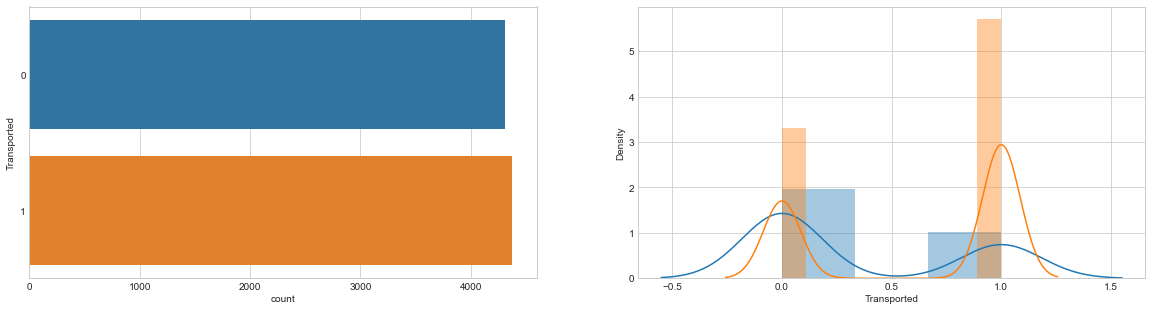

In [297]:
# Visualization of the RoomService bin counts as the RoomService distribution 
# versus Transported.

plot_count_dist(data = train,
               bin_df = df_bin,
               label_column = 'RoomService',
               target_column = 'Transported',
               use_bin_df = True
               )

# Feature Encoding

Now we have our two sub dataframe ready. We can encode the features so they are ready to be used with our machine learning models.

We will encode our binned dataframe(df_bin) with one-hot-encoding and our continuous dataframe(df_con) with the label encoding function of sklearn.



In [305]:
# One-hot encode binned variables

one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Transported')

df_bin_enc = pd.get_dummies(df_bin, columns= one_hot_cols)
df_bin_enc.head(5)

,Transported,Home_Planet_1,Home_Planet_2,Home_Planet_3,CryoSleep_0,CryoSleep_1,Port_0,Port_1,Deck_A,Deck_B,...,"Age_(-0.079, 15.8]","Age_(15.8, 31.6]","Age_(31.6, 47.4]","Age_(47.4, 63.2]","Age_(63.2, 79.0]","RoomService_(-14.327, 2865.4]","RoomService_(2865.4, 5730.8]","RoomService_(5730.8, 8596.2]","RoomService_(8596.2, 11461.6]","RoomService_(11461.6, 14327.0]"
0,0,1,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,0,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [306]:
# Label Encode for all continuous values using label encoder()

df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head(5)

,Transported,Home_Planet,CryoSleep,Port,Deck,Final_Destination,Age,RoomService
0,0,0,0,1,1,0,40,0
1,1,1,0,0,5,0,24,109
2,0,0,0,0,0,0,59,43
3,0,0,0,0,0,0,34,0
4,1,1,0,0,5,0,16,278


The benefit of using Encoding is that we get strings converted to labels. Labels are really useful as machine learning models use numerical values more efficiently.

# Start Building Machine Learning Models

Now or data has been manipulated and converted to numbers, we can run a series of different machine learning algorithms over it to find which yields the best results.

# Let's Separate the Data

In [308]:
# Select the dataframe we want to use first for prediction
selected_df = df_con_enc
selected_df.head(3)

,Transported,Home_Planet,CryoSleep,Port,Deck,Final_Destination,Age,RoomService
0,0,0,0,1,1,0,40,0
1,1,1,0,0,5,0,24,109
2,0,0,0,0,0,0,59,43


In [314]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Transported', axis =1)
y_train = selected_df.Transported

In [315]:
# Shape of the data
X_train.shape

(8693, 7)

In [316]:
# shape pf labels
y_train.shape

(8693,)

# Define a function to fit machine learning algorithms

Since many of the algorithms we will use from the sklearn library, they all take similar inputs and produce similar outputs.

To prevent writing code multiples times, we will functionalise fitting the model and returning the accuracy scores.


In [317]:
#function that runs the requeseted algorithm and returns the accuracy machine.

def fit_ml_algo(algo, X_train, y_train, cv):
    
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train,y_train)*100, 2)
    
    train_pred = model_selection.cross_val_predict(algo , X_train,
                                                   y_train, cv=cv,
                                                  n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100,2)
    
    return train_pred, acc, acc_cv

# Logistic Regression

In [318]:
#Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(),X_train,y_train,10)

log_time= (time.time()-start_time)

print("Accuracy %s" % acc_log)
print("Accuracy CV 10-Fold: %s"% acc_cv_log)
print("Running Time %s" % datetime.timedelta(seconds=log_time))

Accuracy 72.25

Accuracy CV 10-Fold: 72.2

Running Time 0:00:06.255005


# K-Nearest Neighbours

In [319]:
# K-nearest Neighbours

start_time = time.time()
train_pred_knn , acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(),
                                                   X_train,
                                                   y_train,
                                                   10)
knn_time = (time.time()-start_time)
print("Accuracy %s" % acc_knn)
print("Accuracy CV 10-Fold: %s"% acc_cv_knn)
print("Running Time %s" % datetime.timedelta(seconds=knn_time))

Accuracy 77.51

Accuracy CV 10-Fold: 68.08

Running Time 0:00:00.389877


# Gaussian Naive Bayes

In [320]:
# Gaussian Naive bayes
start_time = time.time()
train_pred_gnb , acc_gnb, acc_cv_gnb = fit_ml_algo(GaussianNB(),
                                                   X_train,
                                                   y_train,
                                                   10)
gnb_time = (time.time()-start_time)
print("Accuracy %s" % acc_gnb)
print("Accuracy CV 10-Fold: %s"% acc_cv_gnb)
print("Running Time %s" % datetime.timedelta(seconds=gnb_time))

Accuracy 70.84

Accuracy CV 10-Fold: 70.77

Running Time 0:00:00.070121


# Linear Support vector Machine (SVC)

In [321]:
start_time = time.time()
train_pred_svc , acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(),
                                                   X_train,
                                                   y_train,
                                                   10)
Linear_SVC_time = (time.time()-start_time)
print("Accuracy %s" % acc_svc)
print("Accuracy CV 10-Fold: %s"% acc_cv_svc)
print("Running Time %s" % datetime.timedelta(seconds=Linear_SVC_time))

Accuracy 62.54

Accuracy CV 10-Fold: 60.42

Running Time 0:00:01.030047


# Decision Tree Classifier¶

In [323]:
start_time = time.time()
train_pred_dt , acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),
                                                   X_train,
                                                   y_train,
                                                   10)
dt_time = (time.time()-start_time)
print("Accuracy %s" % acc_dt)
print("Accuracy CV 10-Fold: %s"% acc_cv_dt)
print("Running Time %s" % datetime.timedelta(seconds=dt_time))

Accuracy 89.87

Accuracy CV 10-Fold: 67.81

Running Time 0:00:00.110556


# Gradient boost Tree

In [324]:
start_time = time.time()
train_pred_gbt , acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),
                                                   X_train,
                                                   y_train,
                                                   10)
gbt_time = (time.time()-start_time)
print("Accuracy %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s"% acc_cv_gbt)
print("Running Time %s" % datetime.timedelta(seconds=gbt_time))

Accuracy 74.96

Accuracy CV 10-Fold: 73.92

Running Time 0:00:01.445045


# CatBoost Algorithm

In [325]:
# view the data for the Cat Boost model
X_train.head(3)

,Home_Planet,CryoSleep,Port,Deck,Final_Destination,Age,RoomService
0,0,0,1,1,0,40,0
1,1,0,0,5,0,24,109
2,0,0,0,0,0,59,43


In [326]:
# View the labels for the  CatBoost model
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [327]:
# Define the categorical features for the catBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [328]:
# Use the catBoost Pool() function to pool together the training data 
# and categorical feature labels
from catboost import Pool
train_pool = Pool(X_train, y_train, cat_features)

In [329]:
# CatBoost Model Definition
Catboost_model = CatBoostClassifier(iterations = 100,
                                    custom_loss =['Accuracy'],
                                    loss_function = 'Logloss')

# Fit the CatBoost model
Catboost_model.fit(train_pool, plot = True)

# CatBoost accuracy 
acc_catboost = round(Catboost_model.score(X_train,y_train)*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.214269

0:	learn: 0.6446730	total: 163ms	remaining: 16.1s

1:	learn: 0.6126082	total: 180ms	remaining: 8.81s

2:	learn: 0.5879538	total: 198ms	remaining: 6.4s

3:	learn: 0.5705555	total: 228ms	remaining: 5.46s

4:	learn: 0.5578039	total: 244ms	remaining: 4.63s

5:	learn: 0.5480251	total: 260ms	remaining: 4.07s

6:	learn: 0.5412081	total: 276ms	remaining: 3.67s

7:	learn: 0.5339434	total: 294ms	remaining: 3.38s

8:	learn: 0.5270296	total: 313ms	remaining: 3.17s

9:	learn: 0.5236904	total: 330ms	remaining: 2.97s

10:	learn: 0.5213206	total: 348ms	remaining: 2.82s

11:	learn: 0.5183459	total: 359ms	remaining: 2.63s

12:	learn: 0.5145514	total: 376ms	remaining: 2.52s

13:	learn: 0.5132282	total: 394ms	remaining: 2.42s

14:	learn: 0.5110909	total: 413ms	remaining: 2.34s

15:	learn: 0.5103254	total: 431ms	remaining: 2.26s

16:	learn: 0.5080030	total: 460ms	remaining: 2.24s

17:	learn: 0.5063455	total: 481ms	remaining: 2.19s

18:	learn: 0.5062232	total: 491ms	remaining:

In [330]:
# Perform catBoost Cross-Validation 
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = Catboost_model.get_params()
#print(cv_params) --> {'iterations': 100, 'loss_function': 'Logloss', 'custom_loss': ['Accuracy']}


# Run the cross validation for 10-folds 
cv_data = cv(train_pool, cv_params, fold_count = 10, plot= True)

# How long did it take?
Catboost_time = (time.time()- start_time)

# CatBoost Cv results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost= round(np.max(cv_data['test-Accuracy-mean'])*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

0:	learn: 0.6826780	test: 0.6834115	best: 0.6834115 (0)	total: 14.1ms	remaining: 1.39s

1:	learn: 0.6730309	test: 0.6744739	best: 0.6744739 (1)	total: 30.1ms	remaining: 1.47s

2:	learn: 0.6614923	test: 0.6631869	best: 0.6631869 (2)	total: 51.1ms	remaining: 1.65s

3:	learn: 0.6503039	test: 0.6520336	best: 0.6520336 (3)	total: 81.4ms	remaining: 1.95s

4:	learn: 0.6411366	test: 0.6429409	best: 0.6429409 (4)	total: 104ms	remaining: 1.98s

5:	learn: 0.6323432	test: 0.6344431	best: 0.6344431 (5)	total: 125ms	remaining: 1.95s

6:	learn: 0.6262497	test: 0.6288771	best: 0.6288771 (6)	total: 135ms	remaining: 1.79s

7:	learn: 0.6177888	test: 0.6204961	best: 0.6204961 (7)	total: 152ms	remaining: 1.75s

8:	learn: 0.6105690	test: 0.6135316	best: 0.6135316 (8)	total: 169ms	remaining: 1.71s

9:	learn: 0.6039484	test: 0.6069716	best: 0.6069716 (9)	total: 192ms	remaining: 1.73s

10:	learn: 0.5982304	test: 0.6012785	best: 0.6012785 (10)	total: 211ms	remaining: 1.7s

11:	learn: 0.

In [331]:
# Print out the catboost model metrics

print("Cat Boost Model")
print("Accuracy :{}".format(acc_catboost))
print("Accuracy CV 10-fold :{}".format(acc_cv_catboost))
print("Accuracy :{}".format(datetime.timedelta(seconds = Catboost_time)))

Cat Boost Model

Accuracy :75.08

Accuracy CV 10-fold :74.22

Accuracy :0:00:22.173763


# Model Results
Which model had the best cross-validation accuracy?

Note : We care about cross-valodation metrics because the metrics we got from .fit() can randomly score higher than usual.

# Regular accuracy score

In [332]:
models = pd.DataFrame({
    'Model': ['KNN', 'logistic Regression', 'Naive Bayes','Linear Svc',
              'Decision Tree','Gradient Boosting Tree','CatBoost'],
    'Score': [
        acc_knn,
        acc_log,
        acc_gnb,
        acc_svc,
        acc_dt,
        acc_gbt,
        acc_catboost   
    ]
})

print("======Regular Accuracy Scores=====")
models.sort_values(by='Score', ascending =False)

======Regular Accuracy Scores=====


,Model,Score
4,Decision Tree,89.87
0,KNN,77.51
6,CatBoost,75.08
5,Gradient Boosting Tree,74.96
1,logistic Regression,72.25
2,Naive Bayes,70.84
3,Linear Svc,62.54


# Cross Validation score

In [335]:
models = pd.DataFrame({
    'Model': ['KNN', 'logistic Regression', 'Naive Bayes','Linear Svc',
              'Decision Tree','Gradient Boosting Tree','CatBoost'],
    'Score': [
        acc_cv_knn,
        acc_cv_log,
        acc_cv_gnb,
        acc_cv_svc,
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost   
    ]
})

print("======Cross Validation Scores=====")
models.sort_values(by='Score', ascending =False)

======Cross Validation Scores=====


,Model,Score
6,CatBoost,74.22
5,Gradient Boosting Tree,73.92
1,logistic Regression,72.20
2,Naive Bayes,70.77
0,KNN,68.08
4,Decision Tree,67.81
3,Linear Svc,60.42


# Feature Importance

Which features of the best model were the most important fpor making predictions

In [336]:
# Feature Importances 
def Feature_importance(model, data):
    '''
    Function to show which features are most important in the model
    :: param_model = which model to use?
    :: param_data :: what data to use ?
    
    '''
    
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp','col'],ascending= [True,False]).iloc[-30:]
    _ = fea_imp.plot(kind ='barh',x ='col',y='imp',figsize =(20,10))
    
    return fea_imp

,imp,col
4,3.316023,Final_Destination
2,3.591289,Port
6,7.663179,RoomService
5,8.976769,Age
3,13.384305,Deck
0,14.640733,Home_Planet
1,48.427702,CryoSleep


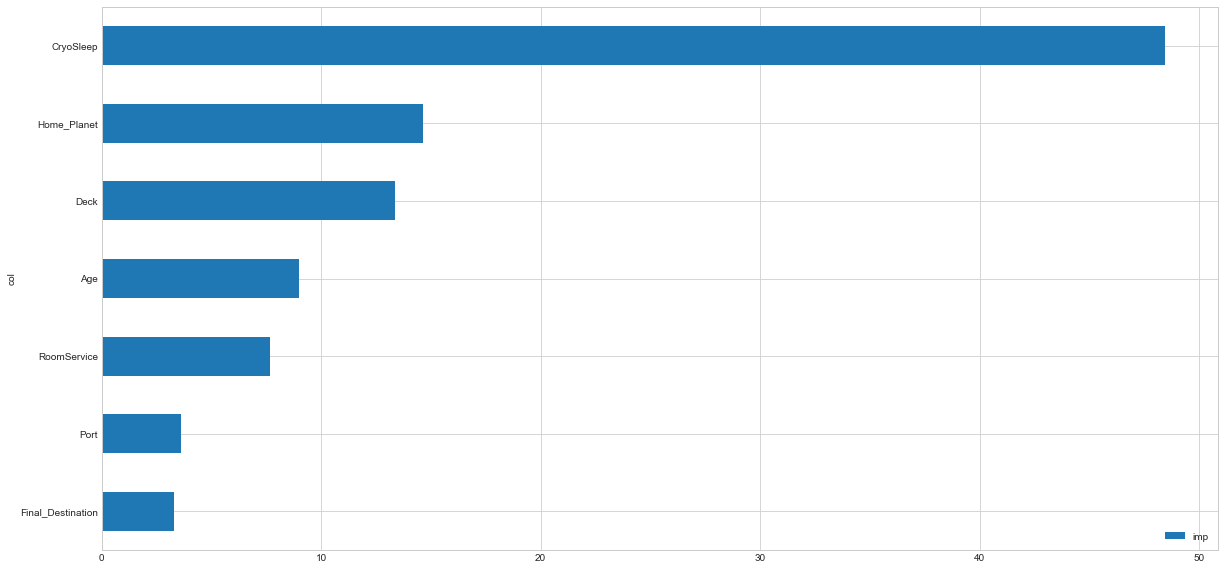

In [337]:
Feature_importance(Catboost_model,X_train)

# Precision and recall

Precision and Recall are two metrics which are used for cases where you have an imbalanced classification problem.

But here, The problem is balanced.

Recall = a metric which measures a models ability to find all the relevant cases in dataset

Precision = a metric which measures a models ability to correctly identify only relevant instances

Combining the precision and recall, gives an F1 score

These metrics will fall between 0 and 1, with higher value being better.


In [339]:
metrics =['Precision','Recall','F1','AUC']

eval_metrics = Catboost_model.eval_metrics(train_pool,
                                         metrics = metrics,
                                         plot= True)

for metric in metrics:
    print(str(metric)+': {}'.format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8053407770404369

Recall: 0.658631795340338

F1: 0.7244785494236382

AUC: 0.8261728009583365


# Submission

In [369]:
final_test_columns = df_con.drop('Transported',axis=1).columns
final_test_columns

Index(['Home_Planet', 'CryoSleep', 'Port', 'Deck', 'Final_Destination', 'Age',
       'RoomService'],
      dtype='object')

In [370]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [371]:
test_dataset = pd.DataFrame()

In [372]:
test_dataset['Home_Planet'] = test['HomePlanet']
test_dataset['CryoSleep'] = test['CryoSleep']

In [373]:
# We can try to extract the Deck and Port from the string
test_sub=[]
test_sub= test.Cabin.fillna('F/0/P')
Deck_Port_list =[];
Port_list=[];
Deck_list=[];
for i in range(len(test.Cabin)):
    Port_list.append(test_sub[i][-1])
    Deck_list.append(test_sub[i][0])


In [374]:
Port_list = pd.Series(Port_list)
Deck_list = pd.Series(Deck_list)

In [375]:
test_dataset['Port'] = Port_list
test_dataset['Deck'] = Deck_list

In [376]:
test_dataset['Final_Destination']= test['Destination']
test_dataset['Age'] = test['Age']
test_dataset['RoomService']= test['RoomService']

In [377]:
test_dataset.head(5)

,Home_Planet,CryoSleep,Port,Deck,Final_Destination,Age,RoomService
0,Earth,True,S,G,TRAPPIST-1e,27.0,0.0
1,Earth,False,S,F,TRAPPIST-1e,19.0,0.0
2,Europa,True,S,C,55 Cancri e,31.0,0.0
3,Europa,False,S,C,TRAPPIST-1e,38.0,0.0
4,Earth,False,S,F,TRAPPIST-1e,20.0,10.0


In [378]:
predictions = Catboost_model.predict(test_dataset.apply(LabelEncoder().fit_transform))

In [387]:
predictions[:15]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [403]:
# Create a submission dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
predictions_true_false = []
for i in range(len(predictions)):
    if predictions[i] == 1:
        predictions_true_false.append('True')
    else:
        predictions_true_false.append('False')
predictions_true_false = pd.Series(predictions_true_false)        

In [404]:
submission['Transported']= predictions_true_false

In [405]:
submission.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [402]:
# Submission look like
sample_submission.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [409]:
# Are our test and submission dataframe the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test({} rows).".format(len(submission)))
else:
    print("Dataframe mismatched, won't be able to submit to kaggle")

Submission dataframe is the same length as test(4277 rows).


In [411]:
# Convert Submission Dataframe to csv for submission to csv
# for Kaggle submission

submission.to_csv('C:/Users/RITIKA VERMA/Desktop/space_voyage_titanic.csv',index = False)
print('Submission CSV is ready')

Submission CSV is ready


In [412]:
# We need to check the submission
submission_check = pd.read_csv('C:/Users/RITIKA VERMA/Desktop/space_voyage_titanic.csv')
submission_check.head(2)

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
